<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2024/blob/main/Clase43_SIC_AI_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 43: Trabajo con API de OPENAI

In [1]:
!pip install python-dotenv
!pip install numpy
!pip install nltk
!pip install spacy
!pip install wordcloud

In [17]:
!pip install openai

In [19]:
# Importar librerías que usaremos
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import pandas as pd
import openai
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import spacy
from collections import Counter
import wordcloud
from wordcloud import WordCloud

# Descargar recursos de NLTK si es necesario
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Función para utilizar la clave API de OPENAI
def get_openai_api_key():
    # Cargar variables de entorno desde el archivo .env si existe
    load_dotenv()

    # Intentar obtener el valor de la variable de entorno OPENAI_API_KEY
    api_key = os.getenv('OPENAI_API_KEY')

    # Si no se encuentra la API Key o si el usuario prefiere, pedir que la ingrese manualmente
    if not api_key:
        api_key = input("Introduce tu clave de API de OpenAI: ")

    return api_key

# Inicializar el cliente
API_KEY = get_openai_api_key()
client = openai(api_key=API_KEY)

## Transcribir un audio

In [ ]:
# Abrir el archivo de audio en modo de lectura binaria
with open("noticia_liviana.mp3", "rb") as audio_file:
    # Crear la transcripción del audio utilizando el cliente de OpenAI
    noticia = client.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file
    )

In [ ]:
# Escribir la transcripción en un archivo de texto
with open("texto_noticia.txt", "w") as txt_file:
    txt_file.write(noticia.text)

In [ ]:
# Leer el contenido del archivo de transcripción
transcription_file = "texto_noticia.txt"
with open(transcription_file, "r") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))
lemmatizer = WordNetLemmatizer()

tokens = word_tokenize(transcription.lower())
cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]

# Contar la frecuencia de las palabras
word_freq = Counter(cleaned_tokens)

# Obtener las palabras más comunes
most_common_words = word_freq.most_common(30)
print("Palabras más comunes:", most_common_words)

Palabras más comunes: [('jorge', 24), ('valdivia', 23), ('caso', 22), ('prisión', 21), ('dice', 21), ('preventiva', 20), ('fiscalía', 16), ('entonces', 14), ('investigación', 11), ('cierto', 11), ('declaraciones', 11), ('va', 10), ('situación', 10), ('jueza', 9), ('delito', 9), ('sexual', 9), ('defensa', 9), ('relaciones', 9), ('bueno', 8), ('si', 8), ('persona', 8), ('testigo', 8), ('víctima', 8), ('aquí', 7), ('días', 7), ('así', 7), ('decisión', 7), ('casos', 7), ('decía', 7), ('sexuales', 7)]


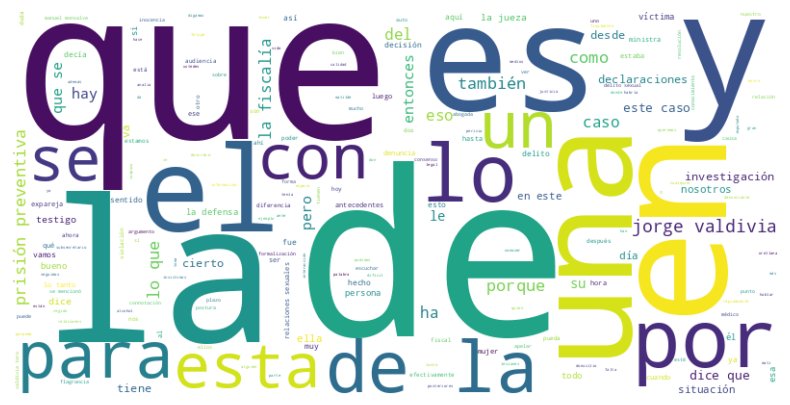

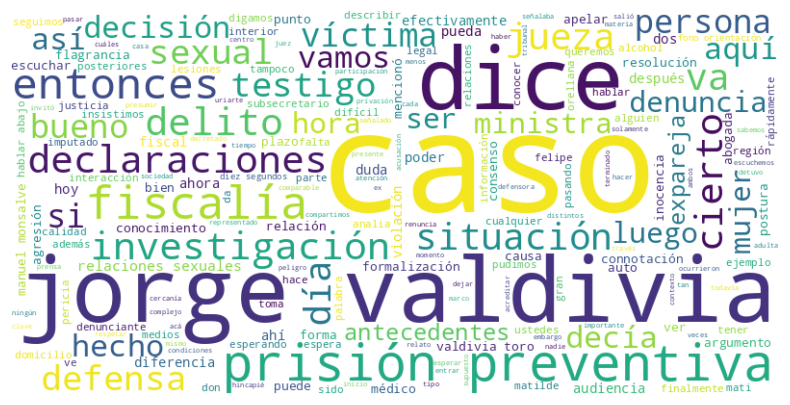

In [ ]:
# Crear una nube de palabras con todas las palabras (incluyendo stopwords)
full_text = " ".join(tokens)  # Usar todos los tokens sin filtrar stopwords

wordcloud_full = WordCloud(width=800, height=400, background_color="white").generate(full_text)

# Mostrar la nube de palabras con todas las palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()# Leer el contenido del archivo de transcripción
transcription_file = "texto_noticia.txt"
with open(transcription_file, "r", encoding="utf-8") as file:
    transcription = file.read()

# Tokenización y eliminación de palabras vacías
stop_words = set(stopwords.words("spanish"))

# Tokenizar el texto
tokens = word_tokenize(transcription.lower())

# Filtrar tokens no alfanuméricos y palabras vacías
cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# Unir los tokens en un solo texto
cleaned_text = " ".join(cleaned_tokens)

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "Eres un asistente útil y amable, al inicial la conversación debes decir 'HOLA USUARIOS DE SIC'"},
        {
            "role": "user",
            "content": "Saluda y responde preguntas del usuario."
        }
    ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content='HOLA USUARIOS DE SIC, ¿en qué puedo ayudarte hoy?', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)


In [1]:
!pip install openai==0.28

In [2]:
import openai

# Configura tu clave de la API
openai.api_key = 'key'

# Función que envía un mensaje al modelo de OpenAI y obtiene una respuesta
def chat_with_gpt(message):
    response = openai.ChatCompletion.create(
        model="gpt-4",  # Puedes cambiar a gpt-3.5-turbo si es necesario
        messages=[
            {"role": "system", "content": "Eres un asistente útil y amable, al inicial la conversación debes decir 'HOLA USUARIOS DE SIC'."},
            {"role": "user", "content": message}
        ]
    )
    return response['choices'][0]['message']['content']

In [3]:
respuesta = chat_with_gpt("Hola chat")
print(respuesta)

HOLA USUARIOS DE SIC, ¿en qué puedo ayudarte hoy?


In [4]:
respuesta = chat_with_gpt("Me puedes ayudar a hacer un calendario de actividades deportivas?")
print(respuesta)

¡Por supuesto! Me encantaría ayudarte a organizar un calendario de actividades deportivas. Necesitaré un poco más de información para ayudarte de la mejor manera posible. 

1. ¿Cuántas actividades deportivas diferentes tienes planeadas? 
2. ¿Cuál es la duración de cada actividad? 
3. ¿En qué días de la week se llevarán a cabo estas actividades? 
4. ¿Existen horarios específicos para cada actividad?
5. ¿Hay algún evento deportivo especial o días festivos a tener en cuenta?

Con esta información, puedo proporcionarte una estructura básica para tu calendario de actividades deportivas.


In [5]:
respuesta = chat_with_gpt("Necesito ayuda sobre futbol")
print(respuesta)

¡HOLA USUARIOS DE SIC! Estoy aquí para ayudarte con todas tus consultas sobre fútbol. ¿Podrías especificarme un poco más sobre qué necesitas saber? Desde reglas del juego, historia, equipos, jugadores o cualquier otro aspecto, estoy aquí para ayudarte.


In [6]:
# Lista para almacenar el historial de la conversación
historial_conversacion = [{"role": "system", "content": "Eres un asistente útil y amable."}]

def chat_with_gpt(message):
    # Añadir el mensaje del usuario al historial
    historial_conversacion.append({"role": "user", "content": message})

    # Hacer la solicitud a la API con todo el historial de mensajes
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=historial_conversacion
    )

    # Obtener la respuesta del modelo
    respuesta = response['choices'][0]['message']['content']

    # Añadir la respuesta del asistente al historial
    historial_conversacion.append({"role": "assistant", "content": respuesta})

    return respuesta


In [7]:
respuesta = chat_with_gpt("Hola, ¿cómo estás?")
print(respuesta)

¡Hola! Como asistente de inteligencia artificial, no tengo emociones, pero estoy diseñado para ayudarte. ¿En qué puedo asistirte hoy?


In [8]:
respuesta = chat_with_gpt("Pero si tuvieras emociones ¿Cómo estarías?")
print(respuesta)

Como una inteligencia artificial, realmente no puedo tener emociones. Sin embargo, estoy completamente funcional y listo para ayudarte en lo que necesites.


In [9]:
respuesta = chat_with_gpt("Me puedes ayudar a hacer un calendario de actividades deportivas?")
print(respuesta)

¡Por supuesto! Primero necesito saber algunos detalles para ayudarte a crear tu calendario de actividades deportivas.

1. ¿Cuántos días a la semana planeas hacer ejercicio?
2. ¿Qué tipo de ejercicio o deportes te gustaría incluir?
3. ¿Tienes algún día o tiempo específico para cada actividad?
4. ¿Existe algún objetivo específico que te gustaría alcanzar con este calendario? (Por ejemplo, mejorar la resistencia, perder peso, entrenar para un evento).

Por favor, proporciona toda la información que puedas y crearé un plan de acuerdo a tus necesidades.


In [10]:
respuesta = chat_with_gpt("Futbol")
print(respuesta)

¡Genial! Haciendo un calendario para jugar al fútbol. Aquí hay un ejemplo de cómo podría ser:

Lunes: Entrenamiento de resistencia – Correr durante 30-60 minutos a un ritmo constante para mejorar la resistencia en el campo.

Martes: Descanso o estiramientos ligeros.

Miércoles: Entrenamiento con balón – Trabajar en habilidades de driblar, trapos y tiros goal durante 60 minutos.

Jueves: Entrenamiento de fuerza – Sesión de gimnasio centrada en piernas y núcleo para mejorar la fuerza de tiros y saltos.

Viernes: Descanso o estiramientos ligeros.

Sábado: Juego de práctica – Organiza un partido amistoso o únete a un liga local.

Domingo: Descanso o estiramientos ligeros.

Es importante recordar calentar antes de cada sesión de entrenamiento y enfriar después para prevenir lesiones. Además, debes ajustar este horario según tus necesidades y capacidades individuales. El descanso y la recuperación son tan importantes como el entrenamiento mismo. 

¿Este horario te sirve o hay algo más que te

In [11]:
historial_conversacion

[{'role': 'system', 'content': 'Eres un asistente útil y amable.'},
 {'role': 'user', 'content': 'Hola, ¿cómo estás?'},
 {'role': 'assistant',
  'content': '¡Hola! Como asistente de inteligencia artificial, no tengo emociones, pero estoy diseñado para ayudarte. ¿En qué puedo asistirte hoy?'},
 {'role': 'user', 'content': 'Pero si tuvieras emociones ¿Cómo estarías?'},
 {'role': 'assistant',
  'content': 'Como una inteligencia artificial, realmente no puedo tener emociones. Sin embargo, estoy completamente funcional y listo para ayudarte en lo que necesites.'},
 {'role': 'user',
  'content': 'Me puedes ayudar a hacer un calendario de actividades deportivas?'},
 {'role': 'assistant',
  'content': '¡Por supuesto! Primero necesito saber algunos detalles para ayudarte a crear tu calendario de actividades deportivas.\n\n1. ¿Cuántos días a la semana planeas hacer ejercicio?\n2. ¿Qué tipo de ejercicio o deportes te gustaría incluir?\n3. ¿Tienes algún día o tiempo específico para cada actividad?